In [28]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
dataset = pd.read_csv("Mall_Customers.csv")
X = dataset.iloc[:,[3,4]] 

In [29]:
# Standardize the features.
# In Affinity Propagation (and many clustering algorithms), the model uses a distance-based similarity metric (typically Euclidean distance) to decide which points are similar or close together.
# so applied scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
from sklearn.cluster import AffinityPropagation

In [31]:
from matplotlib import pyplot as plt

In [20]:
af = AffinityPropagation(random_state=42).fit(X_scaled)

In [21]:
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

In [22]:
print("Estimated number of clusters: %d" % n_clusters_)

Estimated number of clusters: 11


In [23]:
labels

array([ 2,  1,  0,  1,  2,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  2,
        1,  2,  1,  2,  1,  0,  1,  0,  1,  2,  3,  2,  1,  0,  1,  0,  1,
        0,  1,  0,  1,  2,  1,  2,  1,  2,  3,  2,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  5,  4,  5,  5,  4,  4,  4,  5,  4,  5,  4,
        4,  4,  4,  5,  4,  4,  5,  4,  4,  4,  5,  5,  4,  4,  5,  4,  5,
        4,  4,  5,  4,  7,  5,  8,  5,  7,  6,  8,  6,  8,  5,  8,  6,  7,
        6,  8,  6,  8,  6,  7,  5,  7,  6,  7,  5,  8,  6,  7,  6,  7,  6,
        8,  6,  7,  6,  8,  6,  8,  5,  7,  6,  7,  6,  8,  6,  7, 10,  8,
        6,  8,  6,  7,  6,  7,  6,  8, 10,  9, 10,  9, 10,  9, 10,  9, 10,
        9, 10,  9, 10,  9, 10,  9, 10,  9, 10,  9, 10,  9])

In [24]:
supervised = pd.DataFrame(dataset)
supervised['cluster_group']=labels

C:\anaconda3\envs\aiml\Lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


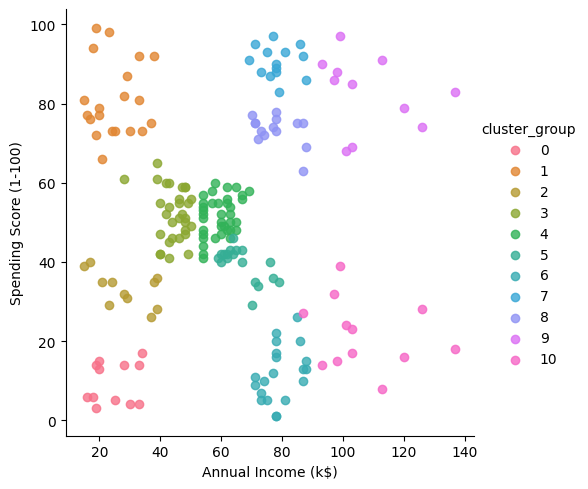

In [25]:
import seaborn as sns
facet = sns.lmplot(data=supervised,x=supervised.columns[3],y=supervised.columns[4],hue=supervised.columns[5],fit_reg=False,legend=True,legend_out=True)

In [4]:
#the cluster count is 11..lets see how to fine tune


In [3]:
####################################################################
#Identify the optimal preference param value to find the cluster counts
#preference (Main parameter to fine-tune)
#Controls how many  cluster centers are chosen.

#Lower preference → fewer clusters

#Higher preference → more clusters

####################################################################

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AffinityPropagation
from sklearn.preprocessing import StandardScaler
from sklearn.exceptions import ConvergenceWarning


df = pd.read_csv("Mall_Customers.csv")
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


preference_values = [-200, -150, -100, -50, 0, 50, 100]
cluster_counts = []

for preference in preference_values:
    af = AffinityPropagation(preference=preference,random_state=42).fit(X_scaled)
    print(f"preference : {preference}, clusters:{len(set(af.labels_))} ")
    




C:\anaconda3\envs\aiml\Lib\site-packages\sklearn\cluster\_affinity_propagation.py:140: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
C:\anaconda3\envs\aiml\Lib\site-packages\sklearn\cluster\_affinity_propagation.py:140: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
C:\anaconda3\envs\aiml\Lib\site-packages\sklearn\cluster\_affinity_propagation.py:140: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


preference : -200, clusters:200 
preference : -150, clusters:200 
preference : -100, clusters:2 
preference : -50, clusters:4 
preference : 0, clusters:199 
preference : 50, clusters:200 
preference : 100, clusters:200 


In [24]:
#here the clusters 2 and 4 are the minimal values and it lies between preference -50 to -100. so we need to take preference between -50 to -100.


af = AffinityPropagation(preference= -50,random_state=42).fit(X_scaled)

C:\anaconda3\envs\aiml\Lib\site-packages\sklearn\cluster\_affinity_propagation.py:140: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


In [25]:
clusters_count = len(set(af.labels_))

In [26]:
print(clusters_count)

4


In [32]:
supervised1 = pd.DataFrame(df)
supervised1['cluster_group']=af.labels_

C:\anaconda3\envs\aiml\Lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


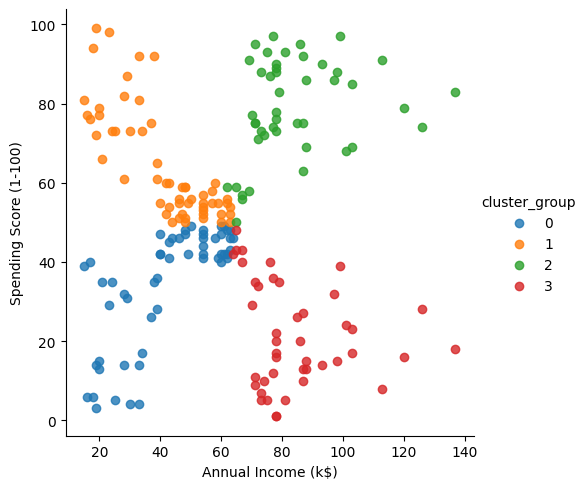

In [36]:
import seaborn as sns
facet = sns.lmplot(data=supervised1,x=supervised1.columns[3],y=supervised1.columns[4],hue=supervised1.columns[5],fit_reg=False,legend=True,legend_out=True)